# Deep Neural Network for Image Classification: Application

Khi bạn hoàn thành bài tập này, bạn sẽ hoàn thành bài tập lập trình cuối cùng của Tuần 4 và cũng là bài tập lập trình cuối cùng của khóa học này!

Bạn sẽ sử dụng các chức năng mà bạn đã triển khai trong nhiệm vụ trước đó để xây dựng một mạng sâu và áp dụng nó để phân loại mèo và không phải mèo. Hy vọng rằng bạn sẽ thấy sự cải thiện về độ chính xác so với việc triển khai hồi quy logistic trước đây của bạn.

** Sau nhiệm vụ này, bạn sẽ có thể: **
- Xây dựng và áp dụng mạng nơ ron sâu cho việc học có giám sát.

Bắt đầu nào!
## 1 - Packages
Đầu tiên, hãy nhập tất cả các gói mà bạn sẽ cần trong quá trình chuyển nhượng này.
- [numpy](https://www.numpy.org/) là gói cơ bản cho tính toán khoa học với Python.
- [matplotlib](http://matplotlib.org) là một thư viện để vẽ đồ thị bằng Python.
- [h5py](http://www.h5py.org) là một gói phổ biến để tương tác với tập dữ liệu được lưu trữ trên tệp H5.
- [PIL](http://www.pythonware.com/products/pil/) và [scipy](https://www.scipy.org/) được sử dụng ở đây để kiểm tra mô hình của bạn với hình ảnh của chính bạn ở cuối .
- dnn_app_utils cung cấp các chức năng được triển khai trong bài tập "Xây dựng mạng thần kinh sâu của bạn: Từng bước" cho sổ tay này.
- np.random.seed (1) được sử dụng để giữ cho tất cả các lệnh gọi hàm ngẫu nhiên nhất quán. Nó sẽ giúp chúng tôi đánh giá công việc của bạn.

In [111]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v3 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2 - Dataset

Bạn sẽ sử dụng cùng một tập dữ liệu "Cat so với non-Cat" như trong "Logistic Regression as a Neural Network" (Bài tập 2). Mô hình bạn đã xây dựng có độ chính xác kiểm tra 70% về phân loại hình ảnh mèo và không phải mèo. Hy vọng rằng mô hình mới của bạn sẽ hoạt động tốt hơn!

**Tuyên bố sự cố**: 

Bạn được cung cấp một tập dữ liệu ("data.h5") chứa:
     - tập hợp các hình ảnh m_train đào tạo được gắn nhãn là mèo (1) hoặc không phải mèo (0)
     - một tập hợp các hình ảnh m_test thử nghiệm được gắn nhãn là mèo và không phải mèo
     - mỗi hình ảnh có hình dạng (num_px, num_px, 3) trong đó 3 là 3 kênh (RGB).

Hãy làm quen với tập dữ liệu. Tải dữ liệu bằng cách chạy ô bên dưới.

In [112]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

Đoạn mã sau sẽ hiển thị cho bạn một hình ảnh trong tập dữ liệu. Hãy thoải mái thay đổi chỉ mục và chạy lại ô nhiều lần để xem các hình ảnh khác.

y = 0. It's a non-cat picture.


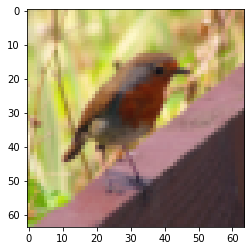

In [113]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [114]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


Như thường lệ, bạn định hình lại và chuẩn hóa các hình ảnh trước khi đưa chúng lên mạng. Mã được đưa ra trong ô bên dưới.

<img src = "images/imvectorkiank.png" style = "width: 450px; height: 300px;">

<caption> <center> <u> Hình 1 </u>: Chuyển đổi hình ảnh sang vector. <br> </center> </caption>

In [115]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


$12,288$ equals $64 \times 64 \times 3$ which is the size of one reshaped image vector.

## 3 - Architecture of your model

Bây giờ bạn đã quen thuộc với tập dữ liệu, đã đến lúc xây dựng một mạng lưới thần kinh sâu để phân biệt hình ảnh mèo với hình ảnh không phải mèo.

Bạn sẽ xây dựng hai mô hình khác nhau:
- Mạng nơron 2 lớp
- Mạng nơron sâu lớp L

Sau đó, bạn sẽ so sánh hiệu suất của các mô hình này và cũng có thể thử các giá trị khác nhau cho $ L $.

Chúng ta hãy nhìn vào hai kiến trúc.

### 3.1 - 2-layer neural network

<img src = "images/2layerNN_kiank.png" style = "width: 650px; height: 400px;">
<caption> <center> <u> Hình 2 </u>: Mạng nơ ron 2 lớp. <br> Mô hình có thể được tóm tắt là: *** INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT ***. </center> </caption>

<u> Kiến trúc chi tiết của hình 2 </u>:
- Đầu vào là hình (64,64,3) được làm phẳng thành vectơ có kích thước $ (12288,1) $.
- Vectơ tương ứng: $ [x_0, x_1, ..., x_ {12287}] ^ T $ sau đó được nhân với ma trận trọng số $ W ^ {[1]} $ có kích thước $ (n ^ {[1]} , 12288) $.
- Sau đó, bạn thêm một số hạng bias và lấy relu của nó để nhận được vectơ sau: $ [a_0 ^ {[1]}, a_1 ^ {[1]}, ..., a_ {n ^ {[1]} - 1 } ^ {[1]}] ^ T $.
- Sau đó bạn lặp lại quy trình tương tự.
- Bạn nhân vectơ kết quả với $ W ^ {[2]} $ và thêm số chặn (độ lệch) của bạn.
- Cuối cùng, bạn lấy sigmoid của kết quả. Nếu nó lớn hơn 0,5, bạn phân loại nó thành mèo.

### 3.2 - L-layer deep neural network

Thật khó để biểu diễn một mạng nơron sâu lớp L với cách biểu diễn trên. Tuy nhiên, đây là một đại diện mạng được đơn giản hóa:

<img src = "images/LlayerNN_kiank.png" style = "width: 650px; height: 400px;">
<caption> <center> <u> Hình 3 </u>: Mạng nơron lớp L. <br> Mô hình có thể được tóm tắt là: *** [LINEAR -> RELU] $ \ times $ (L-1) -> LINEAR -> SIGMOID *** </center> </caption>

<u> Kiến trúc chi tiết của hình 3 </u>:
- Đầu vào là một hình ảnh (64,64,3) được làm phẳng thành một vector có kích thước (12288,1).
- Vectơ tương ứng: $ [x_0, x_1, ..., x_ {12287}] ^ T $ sau đó được nhân với ma trận trọng số $ W ^ {[1]} $ và sau đó bạn thêm vào số chặn $ b ^ {[ 1]} $. Kết quả được gọi là đơn vị tuyến tính.
- Tiếp theo, bạn lấy relu của đơn vị tuyến tính. Quá trình này có thể được lặp lại nhiều lần cho mỗi $ (W ^ {[l]}, b ^ {[l]}) $ tùy thuộc vào kiến ​​trúc mô hình.
- Cuối cùng, bạn lấy sigmoid của đơn vị tuyến tính cuối cùng. Nếu nó lớn hơn 0,5, bạn phân loại nó thành mèo.

### 3.3 - General methodology

Như thường lệ, bạn sẽ làm theo phương pháp Học sâu để xây dựng mô hình:

    1. Khởi tạo tham số / Xác định siêu tham số
    2. Vòng lặp cho num_iterations:
        a. Chuyển tiếp nhân giống
        b. Tính toán hàm chi phí
        c. Truyền bá ngược
        d. Cập nhật các tham số (sử dụng các tham số và điểm từ backprop)
    4. Sử dụng các thông số được đào tạo để dự đoán nhãn

Bây giờ chúng ta hãy thực hiện hai mô hình đó!

## 4 - Two-layer neural network

**Câu hỏi**: Sử dụng các hàm helper mà bạn đã thực hiện trong bài tập trước để xây dựng mạng nơ ron 2 lớp với cấu trúc như sau: *LINEAR -> RELU -> LINEAR -> SIGMOID*. Các chức năng bạn có thể cần và đầu vào của chúng là:

```python
def initialize_parameters(n_x, n_h, n_y):
    ...
    return parameters 
def linear_activation_forward(A_prev, W, b, activation):
    ...
    return A, cache
def compute_cost(AL, Y):
    ...
    return cost
def linear_activation_backward(dA, cache, activation):
    ...
    return dA_prev, dW, db
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [116]:
### CONSTANTS DEFINING THE MODEL ####
n_x = 12288     # num_px * num_px * 3
n_h = 7
n_y = 1
layers_dims = (n_x, n_h, n_y)

In [117]:
# GRADED FUNCTION: two_layer_model

def two_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):
    """
    Implements a two-layer neural network: LINEAR->RELU->LINEAR->SIGMOID.
    
    Arguments:
    X -- input data, of shape (n_x, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- dimensions of the layers (n_x, n_h, n_y)
    num_iterations -- number of iterations of the optimization loop
    learning_rate -- learning rate of the gradient descent update rule
    print_cost -- If set to True, this will print the cost every 100 iterations 
    
    Returns:
    parameters -- a dictionary containing W1, W2, b1, and b2
    """
    
    np.random.seed(1)
    grads = {}
    costs = []                              # to keep track of the cost
    m = X.shape[1]                           # number of examples
    (n_x, n_h, n_y) = layers_dims
    
    # Initialize parameters dictionary, by calling one of the functions you'd previously implemented
    ### START CODE HERE ### (≈ 1 line of code)
    parameters = initialize_parameters(n_x, n_h, n_y)
    ### END CODE HERE ###
    
    # Get W1, b1, W2 and b2 from the dictionary parameters.
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> SIGMOID. Inputs: "X, W1, b1". Output: "A1, cache1, A2, cache2".
        ### START CODE HERE ### (≈ 2 lines of code)
        A1, cache1 = linear_activation_forward(X, W1, b1, activation= "relu")
        A2, cache2 = linear_activation_forward(A1, W2, b2, activation= "sigmoid")
        ### END CODE HERE ###
        
        # Compute cost
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(A2, Y)
        ### END CODE HERE ###
        
        # Initializing backward propagation
        dA2 = - (np.divide(Y, A2) - np.divide(1 - Y, 1 - A2))
        
        # Backward propagation. Inputs: "dA2, cache2, cache1". Outputs: "dA1, dW2, db2; also dA0 (not used), dW1, db1".
        ### START CODE HERE ### (≈ 2 lines of code)
        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, activation = "sigmoid")
        dA0, dW1, db1 = linear_activation_backward(dA1, cache1, activation = "relu")
        ### END CODE HERE ###
        
        # Set grads['dWl'] to dW1, grads['db1'] to db1, grads['dW2'] to dW2, grads['db2'] to db2
        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2
        
        # Update parameters.
        ### START CODE HERE ### (approx. 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###

        # Retrieve W1, b1, W2, b2 from parameters
        W1 = parameters["W1"]
        b1 = parameters["b1"]
        W2 = parameters["W2"]
        b2 = parameters["b2"]
        
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
        if print_cost and i % 100 == 0:
            costs.append(cost)
       
    # plot the cost

    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Chạy ô bên dưới để đào tạo các tham số của bạn. Xem mô hình của bạn có chạy không. Chi phí sẽ giảm. Có thể mất đến 5 phút để chạy 2500 lần lặp. Kiểm tra xem "Chi phí sau lần lặp 0" có khớp với kết quả mong đợi bên dưới hay không, nếu không, hãy nhấp vào ô vuông (⬛) trên thanh trên của sổ ghi chép để dừng ô và cố gắng tìm lỗi của bạn.

Cost after iteration 0: 0.693049735659989
Cost after iteration 100: 0.6464320953428849
Cost after iteration 200: 0.6325140647912678
Cost after iteration 300: 0.6015024920354665
Cost after iteration 400: 0.5601966311605747
Cost after iteration 500: 0.5158304772764729
Cost after iteration 600: 0.4754901313943325
Cost after iteration 700: 0.43391631512257495
Cost after iteration 800: 0.4007977536203889
Cost after iteration 900: 0.3580705011323798
Cost after iteration 1000: 0.3394281538366412
Cost after iteration 1100: 0.30527536361962637
Cost after iteration 1200: 0.27491377282130164
Cost after iteration 1300: 0.2468176821061481
Cost after iteration 1400: 0.1985073503746611
Cost after iteration 1500: 0.17448318112556635
Cost after iteration 1600: 0.17080762978096745
Cost after iteration 1700: 0.11306524562164715
Cost after iteration 1800: 0.09629426845937153
Cost after iteration 1900: 0.0834261795972687
Cost after iteration 2000: 0.07439078704319084
Cost after iteration 2100: 0.0663074813

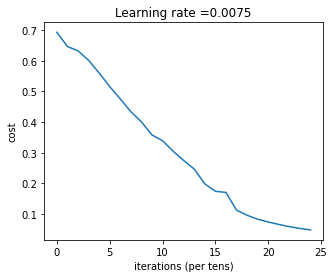

In [118]:
parameters = two_layer_model(train_x, train_y, layers_dims = (n_x, n_h, n_y), num_iterations = 2500, print_cost=True)

**Kết quả mong đợi**:
<table> 
    <tr>
        <td> Cost after iteration 0</td>
        <td> 0.6930497356599888 </td>
    </tr>
    <tr>
        <td> Cost after iteration 100</td>
        <td> 0.6464320953428849 </td>
    </tr>
    <tr>
        <td> ...</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> Cost after iteration 2400</td>
        <td> 0.048554785628770226 </td>
    </tr>
</table>

Thật tốt khi bạn đã xây dựng một triển khai vectơ hóa! Nếu không, nó có thể mất nhiều thời gian hơn 10 lần để đào tạo điều này.

Bây giờ, bạn có thể sử dụng các tham số được đào tạo để phân loại hình ảnh từ tập dữ liệu. Để xem dự đoán của bạn về các tập huấn luyện và kiểm tra, hãy chạy ô bên dưới.

In [119]:
predictions_train = predict(train_x, train_y, parameters)


Accuracy: 0.9999999999999998


In [120]:
predictions_train

array([[0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
        0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
        0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0.,
        0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
        1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0.,
        1., 1., 1., 0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1.,
        0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
        1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
        0.]])

**Kết quả mong đợi**:
<table> 
    <tr>
        <td> Accuracy</td>
        <td> 1.0 </td>
    </tr>
</table>

In [121]:
predictions_test = predict(test_x, test_y, parameters)

Accuracy: 0.72


**Kết quả mong đợi**:

<table> 
    <tr>
        <td> Accuracy</td>
        <td> 0.72 </td>
    </tr>
</table>

**Lưu ý**: 
Bạn có thể nhận thấy rằng việc chạy mô hình với ít lần lặp hơn (giả sử 1500) mang lại độ chính xác tốt hơn trên bộ thử nghiệm. Điều này được gọi là "dừng sớm" và chúng ta sẽ nói về nó trong khóa học tiếp theo. Dừng lại sớm là một cách để ngăn ngừa tình trạng ăn quá nhiều.

Xin chúc mừng! Có vẻ như mạng nơ-ron 2 lớp của bạn có hiệu suất tốt hơn (72%) so với việc triển khai hồi quy logistic (70%, nhiệm vụ tuần 2). Hãy xem liệu bạn có thể làm tốt hơn nữa với mô hình $ L $ -layer hay không.

## 5 - L-layer Neural Network

**Câu hỏi**: Sử dụng các hàm trợ giúp mà bạn đã triển khai trước đây để xây dựng mạng nơ-ron $ L $ -layer với cấu trúc sau: * [LINEAR -> RELU] $ \ times $ (L-1) -> LINEAR -> SIGMOID*. Các chức năng bạn có thể cần và đầu vào của chúng là:
```python
def initialize_parameters_deep(layers_dims):
    ...
    return parameters 
def L_model_forward(X, parameters):
    ...
    return AL, caches
def compute_cost(AL, Y):
    ...
    return cost
def L_model_backward(AL, Y, caches):
    ...
    return grads
def update_parameters(parameters, grads, learning_rate):
    ...
    return parameters
```

In [122]:
### CONSTANTS ###
layers_dims = [12288, 20, 7, 5, 1] #  4-layer model

In [123]:
# GRADED FUNCTION: L_layer_model

def L_layer_model(X, Y, layers_dims, learning_rate = 0.0075, num_iterations = 3000, print_cost=False):#lr was 0.009
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)
    ### START CODE HERE ###
    parameters = initialize_parameters_deep(layers_dims)
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.
        ### START CODE HERE ### (≈ 1 line of code)
        AL, caches = L_model_forward(X, parameters)
        ### END CODE HERE ###
        
        # Compute cost.
        ### START CODE HERE ### (≈ 1 line of code)
        cost = compute_cost(AL, Y)
        ### END CODE HERE ###
    
        # Backward propagation.
        ### START CODE HERE ### (≈ 1 line of code)
        grads = L_model_backward(AL, Y, caches)
        ### END CODE HERE ###
 
        # Update parameters.
        ### START CODE HERE ### (≈ 1 line of code)
        parameters = update_parameters(parameters, grads, learning_rate)
        ### END CODE HERE ###
                
        # Print the cost every 100 training example
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

Bây giờ bạn sẽ huấn luyện mô hình như một mạng nơron 4 lớp.

Chạy ô bên dưới để đào tạo mô hình của bạn. Chi phí sẽ giảm trên mỗi lần lặp lại. Có thể mất đến 5 phút để chạy 2500 lần lặp. Kiểm tra xem "Chi phí sau lần lặp 0" có khớp với kết quả mong đợi bên dưới hay không, nếu không, hãy nhấp vào ô vuông (⬛) trên thanh trên của sổ ghi chép để dừng ô và cố gắng tìm lỗi của bạn.

Cost after iteration 0: 0.771749
Cost after iteration 100: 0.672053
Cost after iteration 200: 0.648263
Cost after iteration 300: 0.611507
Cost after iteration 400: 0.567047
Cost after iteration 500: 0.540138
Cost after iteration 600: 0.527930
Cost after iteration 700: 0.465477
Cost after iteration 800: 0.369126
Cost after iteration 900: 0.391747
Cost after iteration 1000: 0.315187
Cost after iteration 1100: 0.272700
Cost after iteration 1200: 0.237419
Cost after iteration 1300: 0.199601
Cost after iteration 1400: 0.189263
Cost after iteration 1500: 0.161189
Cost after iteration 1600: 0.148214
Cost after iteration 1700: 0.137775
Cost after iteration 1800: 0.129740
Cost after iteration 1900: 0.121225
Cost after iteration 2000: 0.113821
Cost after iteration 2100: 0.107839
Cost after iteration 2200: 0.102855
Cost after iteration 2300: 0.100897
Cost after iteration 2400: 0.092878


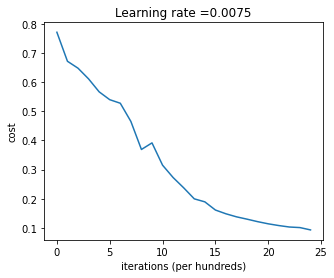

In [124]:
parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 2500, print_cost = True)

**Kết quả mong đợi**:
<table> 
    <tr>
        <td> Cost after iteration 0</td>
        <td> 0.771749 </td>
    </tr>
    <tr>
        <td> Cost after iteration 100</td>
        <td> 0.672053 </td>
    </tr>
    <tr>
        <td> ...</td>
        <td> ... </td>
    </tr>
    <tr>
        <td> Cost after iteration 2400</td>
        <td> 0.092878 </td>
    </tr>
</table>

In [125]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9856459330143539


<table>
    <tr>
    <td>
    Train Accuracy
    </td>
    <td>
    0.985645933014
    </td>
    </tr>
</table>

In [126]:
pred_test = predict(test_x, test_y, parameters)


Accuracy: 0.8


**Kết quả mong đợi**:

<table> 
    <tr>
        <td> Test Accuracy</td>
        <td> 0.8 </td>
    </tr>
</table>

Chúc mừng! Có vẻ như mạng nơ-ron 4 lớp của bạn có hiệu suất tốt hơn (80%) so với mạng nơ-ron 2 lớp (72%) trên cùng một bộ thử nghiệm.

Đây là hiệu suất tốt cho nhiệm vụ này. Công việc tốt!

Mặc dù trong khóa học tiếp theo về "Cải thiện mạng nơ ron sâu", bạn sẽ học cách đạt được độ chính xác cao hơn nữa bằng cách tìm kiếm một cách có hệ thống các siêu tham số tốt hơn (learning_rate, layer_dims, num_iterations và những thứ khác mà bạn cũng sẽ học trong khóa học tiếp theo).

##  6) Results Analysis

Đầu tiên, chúng ta hãy xem một số hình ảnh mà mô hình L-layer được dán nhãn không chính xác. Điều này sẽ hiển thị một vài hình ảnh bị dán nhãn sai.

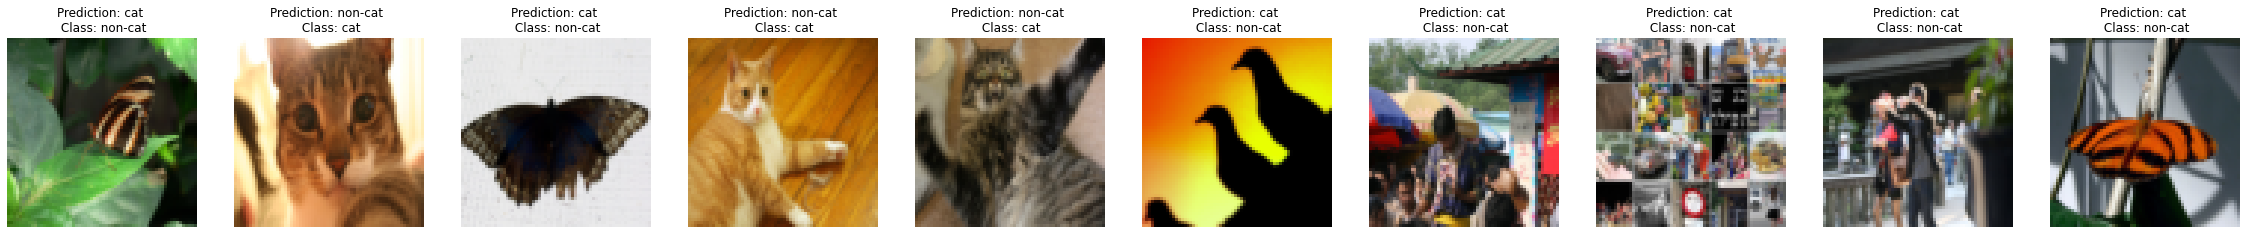

In [127]:
print_mislabeled_images(classes, test_x, test_y, pred_test)

**Một số loại hình ảnh mà mô hình có xu hướng hoạt động kém bao gồm:**
- Cơ thể mèo ở vị trí bất thường
- Con mèo xuất hiện trên nền có màu tương tự
- Màu sắc và loài mèo khác thường
- Góc máy ảnh
- Độ sáng của hình ảnh
- Thay đổi tỷ lệ (con mèo rất lớn hoặc nhỏ trong hình ảnh)

## 7) Test with your own image (optional/ungraded exercise) ##

Chúc mừng bạn đã hoàn thành nhiệm vụ này. Bạn có thể sử dụng hình ảnh của riêng mình và xem đầu ra của mô hình của bạn. Để làm việc đó:

     1. Nhấp vào "Tệp" ở thanh trên của sổ ghi chép này, sau đó nhấp vào "Mở" để truy cập Coursera Hub của bạn.
     2. Thêm hình ảnh của bạn vào thư mục của Máy tính xách tay Jupyter này, trong thư mục "hình ảnh"
     3. Thay đổi tên hình ảnh của bạn trong mã sau
     4. Chạy mã và kiểm tra xem thuật toán có đúng không (1 = cat, 0 = non-cat)!

In [157]:
import imageio
import scipy.misc
from skimage.transform import resize

Accuracy: 0.0
y = 0.0, your L-layer model predicts a "non-cat" picture.


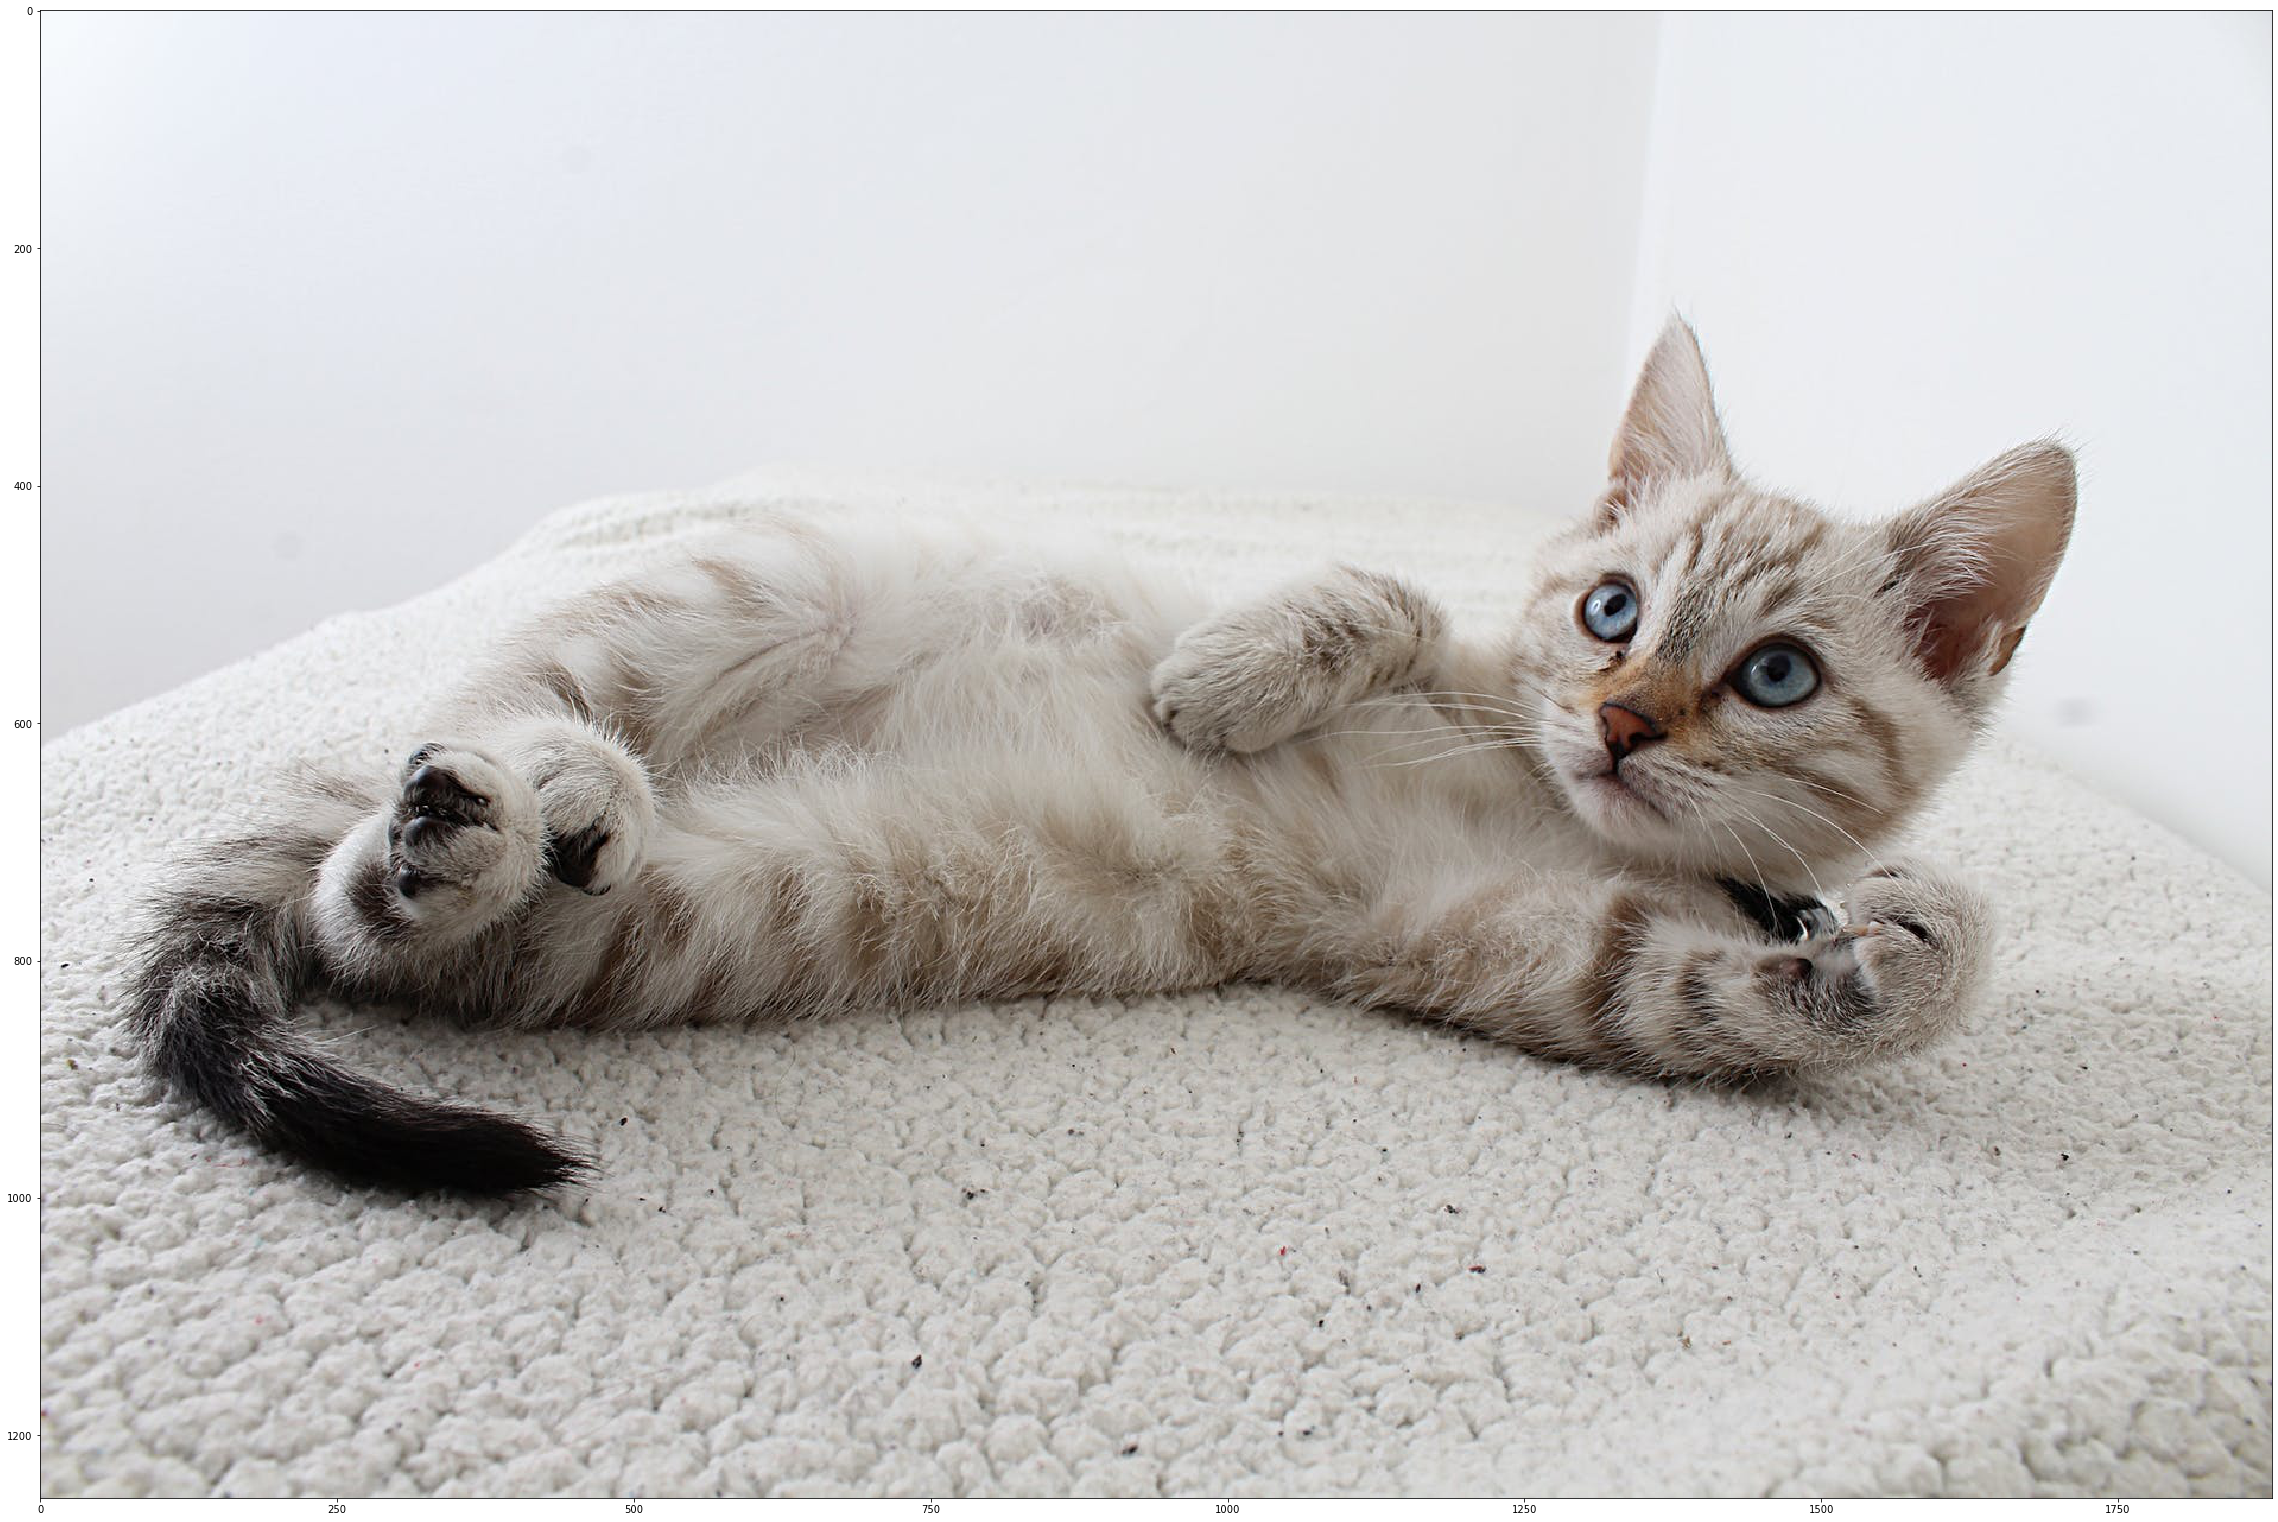

In [158]:

## START CODE HERE ##
my_image = "cat1.jpeg" # change this to the name of your image file 
my_label_y = [1] # the true class of your image (1 -> cat, 0 -> non-cat)
## END CODE HERE ##

fname = "images/" + my_image
image = np.array(imageio.imread(fname))
my_image =resize(image, output_shape=(num_px,num_px)).reshape((num_px*num_px*3,1))
my_image = my_image/255.
my_predicted_image = predict(my_image, my_label_y, parameters)

plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")

**Người giới thiệu**:

- để tự động tải lại mô-đun bên ngoài: http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython